In [12]:
import numpy as np
import tensorflow as tf
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
#from sklearn.gaussian_process import GaussianProcessRegressor
#from sklearn.gaussian_process.kernels import RBF, RationalQuadratic, Matern, ExpSineSquared, Sum, Product

import sys
sys.path.append("..")
from mcpm.kernels import *

np.random.seed(1)

## Functions

In [2]:
def gram_matrix(x1,x2,k):
    init_op = tf.initialize_all_variables()
    with tf.Session() as sess:
        sess.run(init_op)
        k = sess.run(k.kernel(x1,x2))
    return k

# GP function
def GP(a , b, k, mu, kernel, samples) :
    f = np.random.multivariate_normal(mu.flatten(), kernel(a, b, k) , samples)
    return f

## Create Input Data

In [8]:
# Input data
#x0 = np.zeros(1000).reshape(1000,1).astype('float32')
#x = np.linspace(0,2,1000).reshape(-1,1).astype('float32')

x1 = np.linspace(0.0,5.0,50)
x2 = np.linspace(0.0,2.0,50)
#x1,x2 = np.meshgrid(x1,x2)
inputs = np.array([x1.flatten(),x2.flatten()]).astype('float32').T

mean = np.zeros(50)

## Non Stationary Gaussian Kernel

In [46]:
# defining non-stationary gaussian kernel function
def f1(x1,x2):
    cov1 = np.cov(np.array([[x1,0],[x1,0]]))[0,0]
    cov2 = np.cov(np.array([[x2,0],[x2,0]]))[0,0]
    q = (np.abs(x1-x2))*(((cov1+cov2)/2)**(-1))*(np.abs(x1-x2))
    sigma = (cov1**(1/4)*cov2**(1/4))/((cov1+cov2)**(1/2))
    
    return sigma*np.exp(-q)

In [47]:
# generating the outputs
outputs1 = np.zeros((x1.shape[0],x2.shape[0]))
for i in range(x1.shape[0]):
    for j in range(x2.shape[0]):
        outputs1[i,j] = f1(x1[i],x2[j])

C:\Program Files\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in double_scalars
  """
C:\Program Files\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in double_scalars
  """
C:\Program Files\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in double_scalars
  


## Non Stationary Rational Quadratic Kernel

In [48]:
# defining non-stationary kernel function
def f2(x1,x2):
    cov1 = np.cov(np.array([[x1,0],[x1,0]]))[0,0]
    cov2 = np.cov(np.array([[x2,0],[x2,0]]))[0,0]
    q = (np.abs(x1-x2))*(((cov1+cov2)/2)**(-1))*(np.abs(x1-x2))
    sigma = (cov1**(1/4)*cov2**(1/4))/((cov1+cov2)**(1/2))
    
    return sigma*(1/(1+q))

In [49]:
# generating the outputs
outputs2 = np.zeros((x1.shape[0],x2.shape[0]))
for i in range(x1.shape[0]):
    for j in range(x2.shape[0]):
        outputs2[i,j] = f2(x1[i],x2[j])

C:\Program Files\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in double_scalars
  """
C:\Program Files\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in double_scalars
  """
C:\Program Files\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in double_scalars
  


## Non Stationary Matern Kernel

In [50]:
# defining non-stationary kernel function
def f3(x1,x2):
    cov1 = np.cov(np.array([[x1,0],[x1,0]]))[0,0]
    cov2 = np.cov(np.array([[x2,0],[x2,0]]))[0,0]
    q = (np.abs(x1-x2))*(((cov1+cov2)/2)**(-1))*(np.abs(x1-x2))
    sigma = (cov1**(1/4)*cov2**(1/4))/((cov1+cov2)**(1/2))
    
    return sigma*(1 + np.sqrt(3)*(q))*np.exp(-np.sqrt(3)*(q))

In [51]:
# generating the outputs
outputs3 = np.zeros((x1.shape[0],x2.shape[0]))
for i in range(x1.shape[0]):
    for j in range(x2.shape[0]):
        outputs3[i,j] = f3(x1[i],x2[j])

C:\Program Files\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in double_scalars
  """
C:\Program Files\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in double_scalars
  """
C:\Program Files\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in double_scalars
  


## Plots

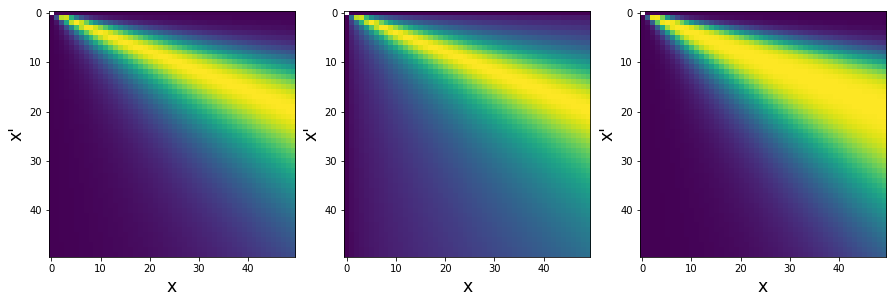

In [56]:
# plotting the non-stationary kernel function
fig, (ax1,ax2,ax3) = plt.subplots(nrows=1,ncols=3,figsize=(15,10))
ax1.set_ylabel("x'",fontsize='xx-large')
ax1.set_xlabel('x', fontsize='xx-large')
ax2.set_ylabel("x'",fontsize='xx-large')
ax2.set_xlabel('x', fontsize='xx-large')
ax3.set_ylabel("x'",fontsize='xx-large')
ax3.set_xlabel('x', fontsize='xx-large')

ax1.imshow(outputs1.reshape(50,50))
ax2.imshow(outputs2.reshape(50,50))
ax3.imshow(outputs3.reshape(50,50))